In [19]:
import numpy as np
import pandas as pd
import random

# Preparing dataset

In [20]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=5, n_redundant=0, n_informative=5, n_clusters_per_class=1, random_state = 42)

In [21]:
df = pd.DataFrame(X, columns=['col1','col2','col3','col4','col5'])
df['target'] = y

In [22]:
print(df.shape)
print(df.head())

(100, 6)
       col1      col2      col3      col4      col5  target
0  1.053909 -3.861208  1.530963  0.596692  1.030284       0
1  3.243492  1.666651  3.179016 -0.825861  0.778528       1
2  0.712446 -1.201617  1.528624 -0.422788 -0.376825       0
3  1.388329  1.538995  1.243716  0.740905 -2.081063       1
4  2.394647 -3.576345  0.914217  0.363136  2.110329       0


# Function for row sampling

In [23]:
def sample_rows(df, percent):
  return df.sample(int(percent * df.shape[0]), replace =True)

# Function for feature sampling

In [24]:
df.columns.tolist()[:-1]
df.shape[1]

6

In [25]:
def sample_features(df, percent):
    col = random.sample(df.columns.tolist()[:-1] , int((percent * df.shape[1])-1))
    return df[col]

# Function for combined sampling

In [26]:
def combined_sampling(df, row_per, col_per):
  new_df = sample_rows(df, row_per)
  return sample_features(new_df, col_per)

# Random Forest using Row Sampling

In [27]:
df1 = sample_rows(df,0.1)
df2 = sample_rows(df,0.1)
df3 = sample_rows(df,0.1)
df1.head()

,col1,col2,col3,col4,col5,target
6,1.141112,2.049215,0.628753,1.427840,0.819933,0
78,2.145224,1.618756,3.119400,0.035656,0.536593,1
82,3.066922,2.623736,2.720047,-0.397211,0.330352,1
36,-1.042432,3.561783,3.429948,2.837269,-0.679050,1
76,0.261778,2.683309,3.987212,1.629975,0.002100,1


<b>Test point</b>

In [28]:
X = df1.drop(columns=['target'])
y = df1['target']
X.iloc[0].values.reshape(1,5).shape

(1, 5)

In [29]:
from sklearn.tree import DecisionTreeClassifier

clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

clf1.fit(df1.iloc[:,0:5],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:5],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:5],df3.iloc[:,-1])

DecisionTreeClassifier()

[Text(0.5, 0.75, 'x[2] <= 0.994\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [0, 5]'),
 Text(0.625, 0.5, '  False')]

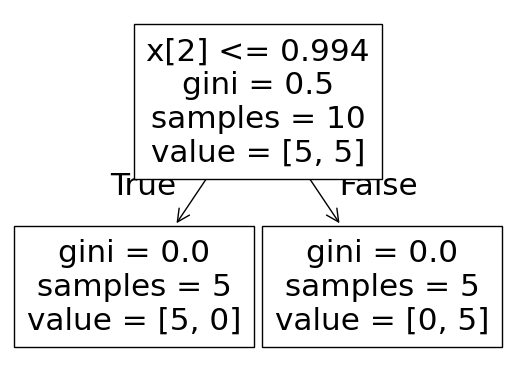

In [30]:
from sklearn.tree import plot_tree
plot_tree(clf1)

[Text(0.5, 0.75, 'x[1] <= 1.051\ngini = 0.48\nsamples = 10\nvalue = [6, 4]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.625, 0.5, '  False')]

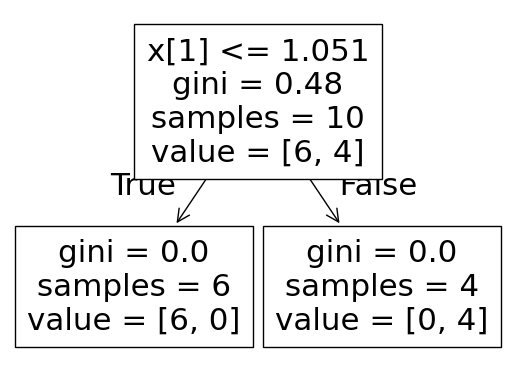

In [31]:
from sklearn.tree import plot_tree
plot_tree(clf2)

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.82\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.4, 0.5, 'x[0] <= -1.476\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.7, 0.6666666666666667, '  False')]

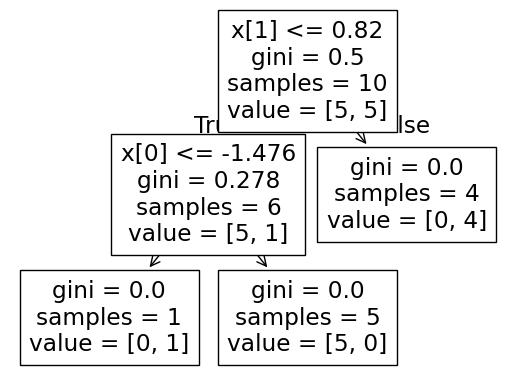

In [32]:
from sklearn.tree import plot_tree
plot_tree(clf3)

In [33]:
dt_bag1_pred = clf1.predict(X.iloc[0].values.reshape(1,5))
dt_bag1_pred

d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [34]:
dt_bag2_pred = clf2.predict(X.iloc[0].values.reshape(1,5))
dt_bag2_pred

d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [35]:
dt_bag3_pred = clf3.predict(X.iloc[0].values.reshape(1,5))
dt_bag3_pred

d:\ML-End-to-End\.venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [36]:
if (dt_bag1_pred[0] == dt_bag2_pred[0] == dt_bag3_pred[0]):
  final = dt_bag1_pred[0]

elif(dt_bag1_pred[0] == dt_bag2_pred[0]):
  final = dt_bag1_pred[0]

elif(dt_bag1_pred[0] == dt_bag3_pred[0]):
  final = dt_bag1_pred[0]

elif(dt_bag2_pred[0] == dt_bag3_pred[0]):
  final = dt_bag2_pred[0]

print('Final Prediction by Random Forest: ', final)

Final Prediction by Random Forest:  1
